<h1 align=center><font size = 5>Capstone Project: Location Data Analysis of Toronto</font></h1>

## Table of contents
[1. Introduction](#introduction)<br>
[2. Data Processing](#data)<br>
[3. Methodology](#methodology)<br>
[4. Results and Discussion](#results)<br>
[5. Conclusion](#conclusion)

### 1. Introduction<a name="introduction"></a>
#### 1.1. Background & Business Problem

According to 2019 ParticipACTION Adult Report Card conducted by Canadian Fitness and Lifestyle Research Institute, 29% of Canadian adults (aged 18 to 79 years old) had low active lifestyle while 18% of them were observed having sedentary lifestyle [1]. Moreover, only 16% of Canadian adults achieved the national guideline of at least 150 minutes of weekly MVPA (Moderate to Vigorous Physical Activity). Engaging sedentary behaviors such as sitting in a reclined position or using computer for extended period of time may increase the risks of obesity, cardiovascular diseases and many more. Reducing sedentary behaviors and increasing physical activity can benefit to many individuals, especially working adults who spend most of their time in the office throughout the day. In addition, a national study investigating work-life balance in Canada revealed that many working Canadians were overloaded by the demands of work and family [2]. 

Thus, in recent years, the commitment in promoting physical activity to get healthier lifestyle was initiated by the government and different organizations. Health and fitness industry has grown exponentially over the last five years due to increasing health consciousness of Canadians. Hence, in this project, as a data scientist, I would like to explore the neighborhoods in Toronto, Canada to open a yoga studio or fitness centre. Toronto, the capital city of the province of Ontario, is a cosmopolitan and most populous city in Canada. Being the international centre for businesses and crowded city with working professionals, Toronto is a good place to consider opening a fitness centre for those who would like to promote active lifestyle among Canadians.

<b>Problem Statement</b> – To choose one of the best neighborhoods in Toronto to open a yoga studio or fitness centre to promote healthy lifestyle

#### 1.2. Target Audience

This section explains the target audience of this project. In other words, it explains who would be interested or which group of people would be benefited from this project. First of all, entrepreneurs who would like to start a business in health and fitness industry in Toronto. The location data analysis in this project will be helpful for them to choose the best neighborhoods in Toronto to start their own business. Moreover, the analysis will guide them in predicting profit and loss of business by locations. Second, the potential customers such as working Canadians in Toronto who would like to engage in active lifestyle can explore neighborhoods with many health and fitness options. Business personnel who would like to invest in health and fitness industry can also be benefited from this project. In addition, this project would be able to tell a story of exploring different neighborhoods by analyzing the datasets and applying machine learning techniques so that other data scientists can explore them as well.

### 2. Data Processing<a name="data"></a>
#### 2.1. Data Sources

The data sources for this project are listed as below:

•	To get the list of all the neighborhoods in Toronto, I will be utilizing web scraping technique to extract the content from Wikipedia page of “List of postal codes of Canada: M” (https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M). The postal code, borough and neighborhood names will be presented in panda dataframe.

•	To get the geospatial data of all the neighborhoods that includes geographical coordinates, Geospatial Coordinates (https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv) csv file will be used. Next, the two dataframes will be combined to get the information of postal code, borough, neighborhood names and their coordinates in one dataframe.
    
•	Foursquare API will be used to explore the most common venues in Toronto. Venue information such as names, categories, latitude, longitude, etc. will be collected. Specifically, I will be exploring the details of neighborhoods that have more offices since it will be good to focus on office workers as potential customers due to exposing more sedentary lifestyle.

•	Since our interest is to open a fitness centre, the required category IDs will be retrieved from Foursquare developer website at https://developer.foursquare.com/docs/build-with-foursquare/categories/.


#### 2.2. Data Acquisition

<b>Installing and Importing required Libraries</b>

In [1]:
!pip install bs4

import numpy as np 
import pandas as pd

import json 

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

from bs4 import BeautifulSoup

print('Libraries imported.')

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1273 sha256=252cb92e87696c865ae0eefb915351fef5578c441300e06f6be74d1fb92d4b64
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/0a/9e/ba/20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
Successfully built bs4
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-OpenCE

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ------------------------

<b>Scraping Wikipedia page for Toronto Neighbourhood Table using BeautifulSoup</b>

In [4]:
url="https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
data=requests.get(url).text
soup=BeautifulSoup(data,"html5lib")

In [5]:
table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighbourhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

In [6]:
#Transform the table into Panda dataframe
df=pd.DataFrame(table_contents)

# Replacing long Borough names to meaningful one
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

# Replacing the name of the neighbourhoods which are 'Not assigned' with names of Borough
df['Neighbourhood'] = np.where(df['Neighbourhood'] == 'Not assigned',df['Borough'], df['Neighbourhood'])

df

,PostalCode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto Business,Enclave of M4L
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


<b>Coordinating Latitude and Longitude of Each Neighbourhood in Toronto</b>

In [7]:
#Importing csv file to get latitude and longitude
lat_lng = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv')
lat_lng.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [8]:
#Merging two dataframe
lat_lng.rename(columns={'Postal Code':'PostalCode'},inplace=True)
df_toronto = pd.merge(df,lat_lng)
df_toronto.head(10)

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills North,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [9]:
#Checking how many unique boroughs and neighborhoods
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df_toronto['Borough'].unique()),
        df_toronto.shape[0]
    )
)

The dataframe has 15 boroughs and 103 neighborhoods.


### 3. Methodology<a name="methodology"></a>

Based on the business problem of this project, the data will be explored and analyzed in the following steps.
* explore the nearby offices, gyms and yoga studios of all the neighborhood in each borough
* decide which borough(s) have more offices and popular among working professionals
* delve into each neighborhood of selected borough
* cluster the neighborhoods of selected borough by predictive modelling and recommend the location

In addition, the following factors are considered to decide the suitable location or neighborhood.
* number of nearby offices
* number of nearby gym/fitness centres, and
* number of nearby yoga studios

#### 3.1. Exploratory Data Analysis

After scraping the necessary neighborhood data and latitude and longitude of each neighborhood, I will be exploring nearby offices, gyms and fitness centres, and yoga studios in all neighborhoods in Toronto. Specifically, the goal is to open a yoga studio or fitness centre for office workers, let's explore the number of nearby offices and gyms in the neighborhoods.

<b>Exploring Nearby Offices, Gyms and Yoga Studios in all the Neighborhood</b>

In [10]:
# The code was removed by Watson Studio for sharing.

For this project, I fetched the category of offices, gym/fitness centres and yoga studios. I set the limit as 100 venues within the radius of 500 metres for each neighborhood. The required category IDs are retrieved from Foursquare developer website at https://developer.foursquare.com/docs/build-with-foursquare/categories/.

In [11]:
office_category='4bf58dd8d48988d124941735' #Root category of offices
gym_category='4bf58dd8d48988d175941735' #Root category of Gym/Fitness Centre
yoga_category='4bf58dd8d48988d102941735' #category id of yoga studio

def get_category(categories):
    return [(cat['name'], cat['id']) for cat in categories]

def getNearbyPlaces(lat, lon, category, client_id, client_secret, radius=500, limit=100):
    version = '20180724'
    
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
        client_id, client_secret, version, lat, lon, category, radius, limit)
    try:
        results = requests.get(url).json()['response']['groups'][0]['items']
        places = [(item['venue']['id'],
                   item['venue']['name'],
                    get_category(item['venue']['categories']),
                   (item['venue']['location']['lat'], item['venue']['location']['lng']),
                   item['venue']['location']['distance']) for item in results] 
        
    except:
        places = []
    return places

def getVenues (borough, names, latitudes, longitudes, radius=500):
    venues_list=[]
    for bor, name, lat, lng in zip(borough, names, latitudes, longitudes):
        
        # Get nearby offices
        nearby_offices = getNearbyPlaces(lat,lng,
                                   category=office_category, client_id=CLIENT_ID, client_secret=CLIENT_SECRET, radius=500, limit=100)
        
        
        # Get nearby gyms/fitness centres
        nearby_gyms = getNearbyPlaces(lat,lng,
                                   category=gym_category, client_id=CLIENT_ID, client_secret=CLIENT_SECRET, radius=500, limit=100)
        
        # Get nearby yoga studios
        nearby_yoga = getNearbyPlaces(lat,lng,
                                   category=yoga_category, client_id=CLIENT_ID, client_secret=CLIENT_SECRET, radius=500, limit=100)
       
    
         # return only relevant information for each nearby venue
        venues_list.append([(
            bor,
            name, 
            lat, 
            lng, 
            len(nearby_offices),
            len(nearby_gyms),
            len(nearby_yoga)
           )])
        
        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues.columns = ['Borough',
                                'Neighborhood', 
                                'Neighborhood Latitude', 
                                'Neighborhood Longitude', 
                                'No. of Nearby Offices', 
                                'No. of Nearby Gym/Fitness Centres',
                                'No. of Nearby Yoga Studios',
                                ]
        
    return nearby_venues

In [10]:
#Nearby offices, gyms, and yoga studios in all neighborhoods
nearby_toronto = getVenues(borough=df_toronto['Borough'], names=df_toronto['Neighbourhood'],
                                   latitudes=df_toronto['Latitude'],
                                   longitudes=df_toronto['Longitude']
                                  )
nearby_toronto.head()

,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,No. of Nearby Offices,No. of Nearby Gym/Fitness Centres,No. of Nearby Yoga Studios
0,North York,Parkwoods,43.753259,-79.329656,5,0,0
1,North York,Victoria Village,43.725882,-79.315572,3,0,0
2,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,23,3,2
3,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,6,4,0
4,Queen's Park,Ontario Provincial Government,43.662301,-79.389494,22,9,2


Now, let's look at the total number of nearby offices, gyms and yoga studios in each borough, so that it will be clear to know which borough should we focus on.

In [13]:
#Total no. of nearby offices, gyms and yoga studios by Borough
df_borough=nearby_toronto.groupby('Borough').sum().reset_index()
for col in df_borough.columns:
    if 'Neighborhood Latitude' in col:
        del df_borough[col]
    if 'Neighborhood Longitude' in col:
        del df_borough[col]
df_borough

,Borough,No. of Nearby Offices,No. of Nearby Gym/Fitness Centres,No. of Nearby Yoga Studios
0,Central Toronto,39,21,9
1,Downtown Toronto,631,208,39
2,Downtown Toronto Stn A,54,15,2
3,East Toronto,25,19,5
4,East Toronto Business,9,4,1
5,East York,14,11,4
6,East York/East Toronto,5,0,0
7,Etobicoke,24,14,2
8,Etobicoke Northwest,2,0,0
9,Mississauga,9,2,0


<b>Visualizing Nearby Places by Borough</b>

Let's visualize the nearby places in each borough.

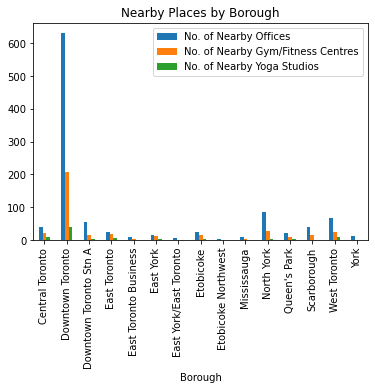

In [14]:
import matplotlib.pyplot as plt
df_borough.plot(x='Borough',
        kind='bar',
        stacked=False,
        title='Nearby Places by Borough')

In [15]:
#Average number of nearby offices, gyms and yoga studios by Borough
df_average=nearby_toronto.groupby('Borough').mean().reset_index()
for col in df_average.columns:
    if 'Neighborhood Latitude' in col:
        del df_average[col]
    if 'Neighborhood Longitude' in col:
        del df_average[col]
df_average

,Borough,No. of Nearby Offices,No. of Nearby Gym/Fitness Centres,No. of Nearby Yoga Studios
0,Central Toronto,4.333333,2.333333,1.000000
1,Downtown Toronto,37.117647,12.235294,2.294118
2,Downtown Toronto Stn A,54.000000,15.000000,2.000000
3,East Toronto,6.250000,4.750000,1.250000
4,East Toronto Business,9.000000,4.000000,1.000000
5,East York,3.500000,2.750000,1.000000
6,East York/East Toronto,5.000000,0.000000,0.000000
7,Etobicoke,2.181818,1.272727,0.181818
8,Etobicoke Northwest,2.000000,0.000000,0.000000
9,Mississauga,9.000000,2.000000,0.000000


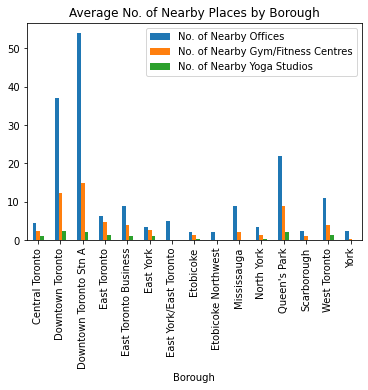

In [16]:
df_average.plot(x='Borough',
        kind='bar',
        stacked=False,
        title='Average No. of Nearby Places by Borough')

#### 3.2. Location Data Analysis

After exploring the neighborhoods in each borough, as can be seen in tables and bar charts, 'Downtown Toronto' is the most popular among working professional with more than 600 nearby offices. Being the central business district, the area is surrounded by city landmarks and popular places such as retail centres and shops, hundreds of restaurants, hotels, boutiques, etc. So, let's investigate more of this area since this is promising area to start a business.

First, let's see only the neighborhoods in 'Downtown Toronto' borough.

In [12]:
df_downtown = df_toronto[df_toronto['Borough'] == 'Downtown Toronto'].reset_index(drop=True)
df_downtown

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
3,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
4,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
5,M6G,Downtown Toronto,Christie,43.669542,-79.422564
6,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
7,M5J,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752
8,M5K,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",43.647177,-79.381576
9,M5L,Downtown Toronto,"Commerce Court, Victoria Hotel",43.648198,-79.379817


And visualize the neighborhoods in Downtown Toronto.

In [13]:
# create map of Downtown Toronto using latitude and longitude values
map_downtown = folium.Map(location=[43.6563221,-79.3809161], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_downtown['Latitude'], df_downtown['Longitude'], df_downtown['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_downtown)  
    
map_downtown

Now, number of nearby offices, gyms and yoga studios in Downtown Toronto will be extracted.

In [18]:
#Nearby offices, gyms, and yoga studios in Downtown Toronto
nearby_downtown = getVenues(borough=df_downtown['Borough'], names=df_downtown['Neighbourhood'],
                                   latitudes=df_downtown['Latitude'],
                                   longitudes=df_downtown['Longitude']
                                  )
nearby_downtown.head()

,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,No. of Nearby Offices,No. of Nearby Gym/Fitness Centres,No. of Nearby Yoga Studios
0,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,23,3,2
1,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,47,18,4
2,Downtown Toronto,St. James Town,43.651494,-79.375418,63,17,2
3,Downtown Toronto,Berczy Park,43.644771,-79.373306,53,7,1
4,Downtown Toronto,Central Bay Street,43.657952,-79.387383,57,19,3


In [19]:
for col in nearby_downtown.columns:
    if 'Neighborhood Latitude' in col:
        del nearby_downtown[col]
    if 'Neighborhood Longitude' in col:
        del nearby_downtown[col]
nearby_downtown

,Borough,Neighborhood,No. of Nearby Offices,No. of Nearby Gym/Fitness Centres,No. of Nearby Yoga Studios
0,Downtown Toronto,"Regent Park, Harbourfront",23,3,2
1,Downtown Toronto,"Garden District, Ryerson",47,18,4
2,Downtown Toronto,St. James Town,63,17,2
3,Downtown Toronto,Berczy Park,53,7,1
4,Downtown Toronto,Central Bay Street,57,19,3
5,Downtown Toronto,Christie,7,4,2
6,Downtown Toronto,"Richmond, Adelaide, King",59,24,3
7,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43,13,0
8,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",70,18,1
9,Downtown Toronto,"Commerce Court, Victoria Hotel",75,22,2


<b>Visualizing Nearby Places by Neighborhood in Downtown Toronto</b>

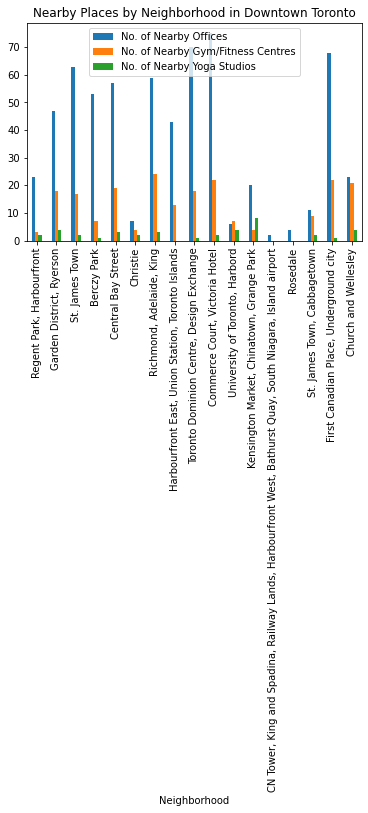

In [20]:
import matplotlib.pyplot as plt
nearby_downtown.plot(x='Neighborhood',
        kind='bar',
        stacked=False,
        title='Nearby Places by Neighborhood in Downtown Toronto')

Let's look at the percentage of nearby gym/fitness centres and yoga studios.

In [21]:
def getPercent (borough, names, off, gym, yoga):
    list_1=[]
    for bor, name, off, gym, yog in zip(borough, names, off, gym, yoga):
        list_1.append([(
            bor,
            name, 
            off,
            gym,
            gym / off * 100,
            yog,
            yog / off *100
           )])
        
        venues_1 = pd.DataFrame([item for v_list in list_1 for item in v_list])
        venues_1.columns = ['Borough',
                                'Neighborhood', 
                                'No. of Nearby Offices', 
                                'No. of Nearby Gym/Fitness Centres',
                                'Percentage of Nearby Gym/Fitness Centres',
                                'No. of Nearby Yoga Studios',
                                'Percentage of Nearby Yoga Studios'
                                ]
        
    return venues_1

In [22]:
dt_percent = getPercent(borough=nearby_downtown['Borough'], names=nearby_downtown['Neighborhood'],
                                   off=nearby_downtown['No. of Nearby Offices'],
                                   gym=nearby_downtown['No. of Nearby Gym/Fitness Centres'],
                                    yoga=nearby_downtown['No. of Nearby Yoga Studios']
                                  )
dt_percent

,Borough,Neighborhood,No. of Nearby Offices,No. of Nearby Gym/Fitness Centres,Percentage of Nearby Gym/Fitness Centres,No. of Nearby Yoga Studios,Percentage of Nearby Yoga Studios
0,Downtown Toronto,"Regent Park, Harbourfront",23,3,13.043478,2,8.695652
1,Downtown Toronto,"Garden District, Ryerson",47,18,38.297872,4,8.510638
2,Downtown Toronto,St. James Town,63,17,26.984127,2,3.174603
3,Downtown Toronto,Berczy Park,53,7,13.207547,1,1.886792
4,Downtown Toronto,Central Bay Street,57,19,33.333333,3,5.263158
5,Downtown Toronto,Christie,7,4,57.142857,2,28.571429
6,Downtown Toronto,"Richmond, Adelaide, King",59,24,40.677966,3,5.084746
7,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43,13,30.232558,0,0.000000
8,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",70,18,25.714286,1,1.428571
9,Downtown Toronto,"Commerce Court, Victoria Hotel",75,22,29.333333,2,2.666667


And visualize the percentage by neighborhood in Downtown Toronto.

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/ipykernel/__main__.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


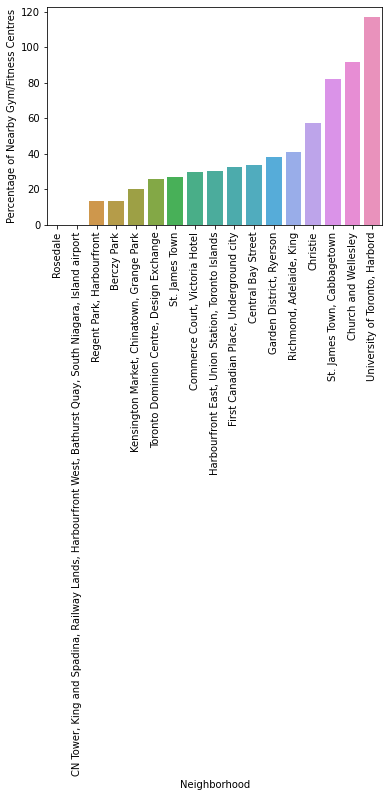

In [23]:
neigh=dt_percent['Neighborhood']
percent_gym=dt_percent['Percentage of Nearby Gym/Fitness Centres']

import seaborn as sns

sns.barplot(x=neigh,
            y=percent_gym, data=dt_percent, 
            order=dt_percent.sort_values('Percentage of Nearby Gym/Fitness Centres').Neighborhood)
plt.xticks(rotation=90)
plt.tight_layout()

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/ipykernel/__main__.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


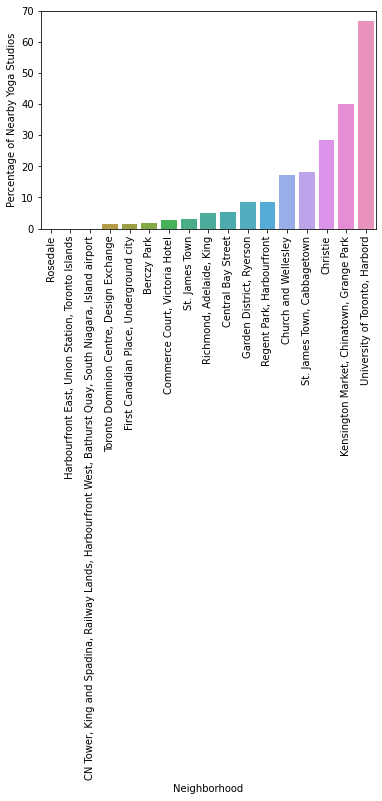

In [24]:
neigh=dt_percent['Neighborhood']
percent_yoga=dt_percent['Percentage of Nearby Yoga Studios']

sns.barplot(x=neigh,
            y=percent_yoga, data=dt_percent, 
            order=dt_percent.sort_values('Percentage of Nearby Yoga Studios').Neighborhood)
plt.xticks(rotation=90)
plt.tight_layout()

#### 3.3. Predictive Modelling

<b>Clustering Neighborhood by K-means clustering</b>

To cluster the neighborhoods, unsupervised machine learning technique K-means algorithm will be adopted in this project. First, the elbow method is used to identify the optimal k value in a given dataset. As shown in the figure below, the best k value seems to be 3 after analyzing elbow method using distortions.

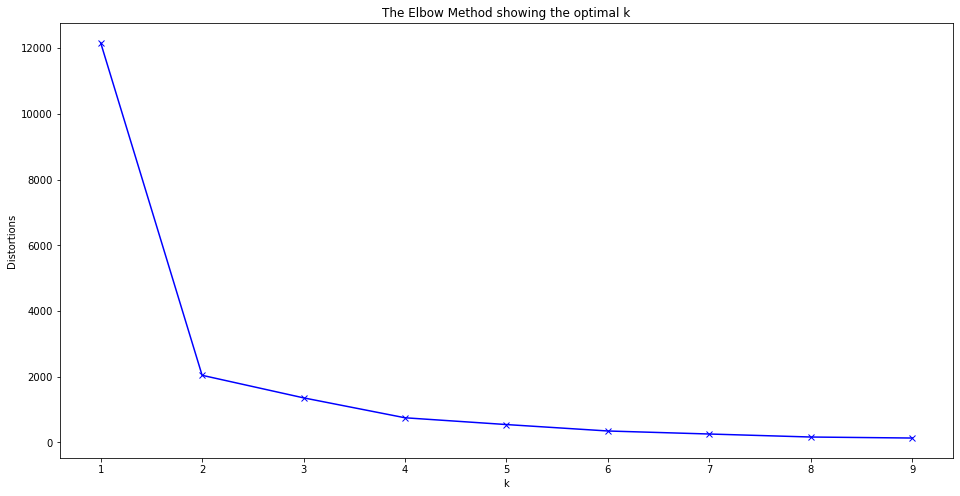

In [26]:
nearby_downtown = nearby_downtown.drop(['Borough', 'Neighborhood'], 1)

distortions=[]
for k in range(1,10):
    km=KMeans(n_clusters=k)
    km.fit(nearby_downtown)
    distortions.append(km.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(range(1,10), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('The Elbow Method showing the optimal k')
plt.show()

So, let's create three clusters.

In [27]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nearby_downtown)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 0, 2, 0, 2, 1, 2, 0, 2, 2], dtype=int32)

In [28]:
# insert cluster labels in existing dataframe
nearby_downtown.insert(0, 'Cluster Labels', kmeans.labels_)

In [29]:
# insert the neighborhood column back
nearby_downtown.insert(0,'Neighborhood',dt_percent['Neighborhood'],False)
nearby_downtown

,Neighborhood,Cluster Labels,No. of Nearby Offices,No. of Nearby Gym/Fitness Centres,No. of Nearby Yoga Studios
0,"Regent Park, Harbourfront",1,23,3,2
1,"Garden District, Ryerson",0,47,18,4
2,St. James Town,2,63,17,2
3,Berczy Park,0,53,7,1
4,Central Bay Street,2,57,19,3
5,Christie,1,7,4,2
6,"Richmond, Adelaide, King",2,59,24,3
7,"Harbourfront East, Union Station, Toronto Islands",0,43,13,0
8,"Toronto Dominion Centre, Design Exchange",2,70,18,1
9,"Commerce Court, Victoria Hotel",2,75,22,2


Now, let's examine each cluster.

In [30]:
nearby_downtown.loc[nearby_downtown['Cluster Labels'] == 0]

,Neighborhood,Cluster Labels,No. of Nearby Offices,No. of Nearby Gym/Fitness Centres,No. of Nearby Yoga Studios
1,"Garden District, Ryerson",0,47,18,4
3,Berczy Park,0,53,7,1
7,"Harbourfront East, Union Station, Toronto Islands",0,43,13,0


In [31]:
nearby_downtown.loc[nearby_downtown['Cluster Labels'] == 0].mean()

Cluster Labels                        0.000000
No. of Nearby Offices                47.666667
No. of Nearby Gym/Fitness Centres    12.666667
No. of Nearby Yoga Studios            1.666667
dtype: float64

In [32]:
nearby_downtown.loc[nearby_downtown['Cluster Labels'] == 1]

,Neighborhood,Cluster Labels,No. of Nearby Offices,No. of Nearby Gym/Fitness Centres,No. of Nearby Yoga Studios
0,"Regent Park, Harbourfront",1,23,3,2
5,Christie,1,7,4,2
10,"University of Toronto, Harbord",1,6,7,4
11,"Kensington Market, Chinatown, Grange Park",1,20,4,8
12,"CN Tower, King and Spadina, Railway Lands, Har...",1,2,0,0
13,Rosedale,1,4,0,0
14,"St. James Town, Cabbagetown",1,11,9,2
16,Church and Wellesley,1,23,21,4


In [33]:
nearby_downtown.loc[nearby_downtown['Cluster Labels'] == 1].mean()

Cluster Labels                        1.00
No. of Nearby Offices                12.00
No. of Nearby Gym/Fitness Centres     6.00
No. of Nearby Yoga Studios            2.75
dtype: float64

In [34]:
nearby_downtown.loc[nearby_downtown['Cluster Labels'] == 2]

,Neighborhood,Cluster Labels,No. of Nearby Offices,No. of Nearby Gym/Fitness Centres,No. of Nearby Yoga Studios
2,St. James Town,2,63,17,2
4,Central Bay Street,2,57,19,3
6,"Richmond, Adelaide, King",2,59,24,3
8,"Toronto Dominion Centre, Design Exchange",2,70,18,1
9,"Commerce Court, Victoria Hotel",2,75,22,2
15,"First Canadian Place, Underground city",2,68,22,1


In [35]:
nearby_downtown.loc[nearby_downtown['Cluster Labels'] == 2].mean()

Cluster Labels                        2.000000
No. of Nearby Offices                65.333333
No. of Nearby Gym/Fitness Centres    20.333333
No. of Nearby Yoga Studios            2.000000
dtype: float64

<b>Visualizing Nearby offices, gyms, and yoga studios by Clusters</b>

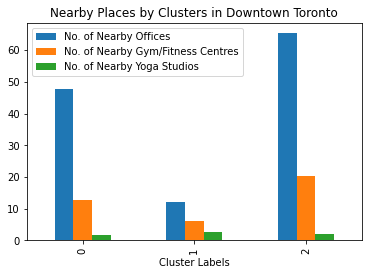

In [36]:
df_cluster=nearby_downtown.groupby('Cluster Labels').mean().reset_index()
df_cluster.plot(x='Cluster Labels',
        kind='bar',
        stacked=False,
        title='Nearby Places by Clusters in Downtown Toronto')

In [37]:
# insert latitude and longitude of each neighborhood back
nearby_downtown.insert(1,'Latitude',df_downtown['Latitude'],False)
nearby_downtown.insert(2,'Longitude',df_downtown['Longitude'],False)
nearby_downtown

,Neighborhood,Latitude,Longitude,Cluster Labels,No. of Nearby Offices,No. of Nearby Gym/Fitness Centres,No. of Nearby Yoga Studios
0,"Regent Park, Harbourfront",43.654260,-79.360636,1,23,3,2
1,"Garden District, Ryerson",43.657162,-79.378937,0,47,18,4
2,St. James Town,43.651494,-79.375418,2,63,17,2
3,Berczy Park,43.644771,-79.373306,0,53,7,1
4,Central Bay Street,43.657952,-79.387383,2,57,19,3
5,Christie,43.669542,-79.422564,1,7,4,2
6,"Richmond, Adelaide, King",43.650571,-79.384568,2,59,24,3
7,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752,0,43,13,0
8,"Toronto Dominion Centre, Design Exchange",43.647177,-79.381576,2,70,18,1
9,"Commerce Court, Victoria Hotel",43.648198,-79.379817,2,75,22,2


<b>Creating map of clusters in Downtown Toronto</b>

In [40]:
# create map
dtmap_clusters = folium.Map(location=[43.6563221,-79.3809161], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nearby_downtown['Latitude'], nearby_downtown['Longitude'], nearby_downtown['Neighborhood'], nearby_downtown['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1).add_to(dtmap_clusters)
       
dtmap_clusters

The analysis and visualization of bar charts and cluster map helps us in identifying the most promising neighborhood to open a yoga studio or fitness centre. Cluster 0 represents the middle cluster with average no. of 48 offices, 13 gym/fitness centres and 2 yoga studios nearby. Cluster 1 has the least average no. of places with 12 offices, 6 gym/fitness centres and 3 yoga studios. Meanwhile, Cluster 3 stands out with the highest average no. of nearby places with 65 offices, 20 gym/fitness centres and 2 yoga studios.

When we look at the cluster map, Cluster 0 (shown in red color in the map) and Cluster 1 (shown in blue color in the map) are sparsed across the Downtown Toronto while neighborhoods in Cluster 2 (shown in green color in the map) are grouped together which seem to be popular places with a lot of offices. Thus, I decided to take a closer look at Cluster 2 and explore the area.

<b>Financial District, Toronto</b>

As shown in the map, three of the six neighborhoods in Cluster 2 are in Financial District. Finacial District, Toronto is considered to be the main business district with many office towers and centre of Canada's financial industry. For this project, I do not want the new business place to be in the secluded area with little number of offices and gyms. Thus, let's explore the neighborhood around financial district. I am curious about the popular spots within 500 metres of the financial district area. So, let's input the latitude and longitude of financial district and url first. I will be using Foursquare API to get the info about the locations.

In [46]:
#Latitude and Longitude of Financial District
latitude = 43.647935
longitude = -79.381752

In [47]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=NA4XJYM3IIKJUI5UNKPH3DSOAXIIBSHOHQI1G1DWHBSO2QS5&client_secret=FIICSW4UED0TVO2MKH4JZDYC10CGUFDODWURNHXTZOYNL521&ll=43.647935,-79.381752&v=20180604&radius=500&limit=30'

In [48]:
results = requests.get(url).json()
'There are {} popular places around Financial District.'.format(len(results['response']['groups'][0]['items']))

'There are 30 popular places around Financial District.'

In [49]:
items = results['response']['groups'][0]['items']
items[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '4ad4c05df964a52059f620e3',
  'name': 'Canoe',
  'location': {'address': '66 Wellington St West',
   'crossStreet': 'at Bay Street',
   'lat': 43.647452066183476,
   'lng': -79.38132001815676,
   'labeledLatLngs': [{'label': 'display',
     'lat': 43.647452066183476,
     'lng': -79.38132001815676}],
   'distance': 64,
   'postalCode': 'M5K 1H6',
   'cc': 'CA',
   'city': 'Toronto',
   'state': 'ON',
   'country': 'Canada',
   'formattedAddress': ['66 Wellington St West (at Bay Street)',
    'Toronto ON M5K 1H6',
    'Canada']},
  'categories': [{'id': '4bf58dd8d48988d1c4941735',
    'name': 'Restaurant',
    'pluralName': 'Restaurants',
    'shortName': 'Restaurant',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
     'suffix': '.png'},
    'primary': True}],
  'photos': {'count': 0, 'groups': [

Let's convert it into clean dataframe.

In [50]:
dataframe = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(10)

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if __name__ == '__main__':


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,Canoe,Restaurant,66 Wellington St West,at Bay Street,43.647452,-79.381320,"[{'label': 'display', 'lat': 43.64745206618347...",64,M5K 1H6,CA,Toronto,ON,Canada,"[66 Wellington St West (at Bay Street), Toront...",NaN,4ad4c05df964a52059f620e3
1,Maman,Café,100 King St W,btwn Bay & York st,43.648309,-79.382253,"[{'label': 'display', 'lat': 43.64830873804684...",57,M5X 1C1,CA,Toronto,ON,Canada,"[100 King St W (btwn Bay & York st), Toronto O...",NaN,559a8f5a498e31f945041245
2,Hy's Steakhouse,Steakhouse,120 Adelaide St. W,at York St,43.649505,-79.382919,"[{'label': 'display', 'lat': 43.64950475647694...",198,M5H 1T1,CA,Toronto,ON,Canada,"[120 Adelaide St. W (at York St), Toronto ON M...",NaN,4bd8cde92e6f0f47dcb20808
3,Equinox Bay Street,Gym,199 Bay St,"at Commerce Court West, PATH Level",43.648100,-79.379989,"[{'label': 'display', 'lat': 43.64809974034856...",143,M5L 1L5,CA,Toronto,ON,Canada,"[199 Bay St (at Commerce Court West, PATH Leve...",NaN,501ae947e4b0d11883b910a7
4,Adelaide Club Toronto,Gym / Fitness Center,1 First Canadian Place,NaN,43.649279,-79.381921,"[{'label': 'display', 'lat': 43.64927944291712...",150,M5X 1C8,CA,Toronto,ON,Canada,"[1 First Canadian Place, Toronto ON M5X 1C8, C...",NaN,4ea43642be7ba4918efc5afa
5,Pilot Coffee Roasters,Coffee Shop,100 King St W,Bay St,43.648835,-79.380936,"[{'label': 'display', 'lat': 43.64883539124589...",119,M5X,CA,Toronto,ON,Canada,"[100 King St W (Bay St), Toronto ON M5X, Canada]",NaN,59cd51c71b0ea516e9e7b3aa
6,Brick Street Bakery,Bakery,100 King St W,at Bay St.,43.648815,-79.380605,"[{'label': 'display', 'lat': 43.6488151631615,...",134,NaN,CA,Toronto,ON,Canada,"[100 King St W (at Bay St.), Toronto ON, Canada]",NaN,4dcbf219d22d7ffe9d39197e
7,Cactus Club Cafe,American Restaurant,77 Adelaide St W,btwn Bay & York St,43.649552,-79.381671,"[{'label': 'display', 'lat': 43.6495520142626,...",180,M5X 1C1,CA,Toronto,ON,Canada,"[77 Adelaide St W (btwn Bay & York St), Toront...",NaN,55fc571f498ec35023360858
8,Bymark,Restaurant,66 Wellington St. W,btwn York & Bay St.,43.647217,-79.381252,"[{'label': 'display', 'lat': 43.64721728401800...",89,M5K 1J3,CA,Toronto,ON,Canada,"[66 Wellington St. W (btwn York & Bay St.), To...",NaN,4ae7199ff964a52068a821e3
9,Walrus Pub & Beer Hall,Pub,187 Bay St,Wellington St W,43.647375,-79.379515,"[{'label': 'display', 'lat': 43.64737470920577...",190,M5L 1G5,CA,Toronto,ON,Canada,"[187 Bay St (Wellington St W), Toronto ON M5L ...",NaN,5a8f505eb6eedb5c284a78ad


<b>Let's visualize these places around Financial District.</b>

In [51]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Financial District


# add Financial District as a red circle mark
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup='Financial District',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)


# add popular spots to the map as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(venues_map)

# display map
venues_map

After exploring the popular spots around financial district, there are different categories such as restaurants, cafe, gym, bakery, etc. As our interest is to open a fitness centre, let's explore specifically on how many gym or fitness centres and offices near the area.

In [55]:
def get_venues_nearby(lat, lon, category, client_id, client_secret, radius=500, limit=100):
    version = '20180724'
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
        client_id, client_secret, version, lat, lon, category, radius, limit)
    try:
        results = requests.get(url).json()['response']['groups'][0]['items']
        venues = [(item['venue']['id'],
                   item['venue']['name'],
                   get_category(item['venue']['categories']),
                   (item['venue']['location']['lat'], item['venue']['location']['lng']),
                   item['venue']['location']['distance']) for item in results]        
    except:
        venues = []
    return venues

In [56]:
office_venues = get_venues_nearby(latitude, longitude, office_category, CLIENT_ID, CLIENT_SECRET, radius=500, limit=100)
print('Total number of offices near Financial District:', len(office_venues))

Total number of offices near Financial District: 72


In [57]:
gym_venues = get_venues_nearby(latitude, longitude, gym_category, CLIENT_ID, CLIENT_SECRET, radius=500, limit=100)
print('Total number of Gym/Fitness Centres near Financial District:', len(gym_venues))

Total number of Gym/Fitness Centres near Financial District: 19


In [58]:
yoga_venues = get_venues_nearby(latitude, longitude, yoga_category, CLIENT_ID, CLIENT_SECRET, radius=500, limit=100)
print('Total number of Yoga Studio near Financial District:', len(yoga_venues))

Total number of Yoga Studio near Financial District: 1


### 4. Results and Discussion<a name="results"></a>

The main goal of this project is to analyze the neighborhood location to decide where to open a yoga studio or fitness centre to promote healthier lifestyle for Canadian working professionals. Thus, the locations and places in this project mainly refer to offices, gym/fitness centres and yoga studios. After exploring the nearby places in each borough, Downtown Toronto has the most number of offices and gyms nearby, followed by North York and West Toronto. Thus, Downtown Toronto is focused for more in-depth analysis.

The analysis shows that there are many neighborhood candidates in Downtown Toronto. With the help of predictive modelling, specifically K-means clustering helps to identify the different clusters of each neighborhoods. After analyzing the elbow method, I used the best value of k=3 to cluster the neighborhoods. Cluster 0 represents the middle cluster with average no. of 48 offices, 13 gym/fitness centres and 2 yoga studios nearby. Cluster 1 has the least average no. of places with 12 offices, 6 gym/fitness centres and 3 yoga studios. Meanwhile, Cluster 3 stands out with the highest average no. of nearby places with 65 offices, 20 gym/fitness centres and 2 yoga studios.

When choosing the best location to run the fitness business in this project, the more popular places with more offices is mainly considered. The decision factor(s), of course, will be different for each individual and business personnel. Thus, the optimal places to open a business will be different based on business problem and decision criterias. Here, I would recommend to explore more on Financial District area in Downtown Toronto. According to data analysis, there are 72 nearby offices within 500 metres of Financial District, in which there are 19 gym/fitness centres and only 1 yoga studios. Thus, starting a yoga studio in the area would not be a bad idea.

Some limitations of the analysis would be the location data obtained in this project which is completely from Foursquare API and the decision criteria is mainly subjective. However, this could be the starting point for more detailed analysis and insightful recommendations of future studies.

### 5. Conclusion<a name="conclusion"></a>

To conclude the project, due to the sedentary lifestyle and spending most of the time in offices, working Canadians have difficulty in work-life balance and they are overloaded by demand of work and family. So, the idea is to choose one of the best neighborhoods in Toronto to open a yoga studio or fitness centre to promote healthy lifestyle. First, after collecting the necessary data, the nearby offices, gyms and yoga studios of all the neighborhoods in each borough in Toronto was explored. Second, the borough with more offices and popular among working professionals was selected and delved into each neighborhoods of selected borough which was Downtown Toronto. Next, the predictive modelling helped to identify the three clusters of Downtown Toronto and recommended the location.

As mentioned before, the decision criterias to choose the optimal place(s) to run a yoga studio or a fitness centre will be different for each business personnel and there are not only location but other additional factors to consider. However, this project can hopefully act as an initial concept for other business ideas using data science.

<h1 align=center><font size = 3>----- End of Project -----</font></h1>